# SEGMENTATION

On appelle segmentation d'une image l'opération consistant à identifier les structures d'intérêt dans cette image. On distingue deux types d'approches pour la segmentation : contour ou région.

Dans l'approche contour, on cherche à isoler le ou les contours des objets d'intérêt. Le résultat se présente en général sous la forme d'un ensemble de chaînes de pixels, et des traitements additionnels sont souvent nécessaires pour associer les contours aux objets d'intérêt.

L'autre approche cherche à identifier des régions de pixels homogènes au sein de l'image. Le critère d'homogénéité peut être l'intensité, la couleur, ou même la texture locale. Le résultat se présente soit sous la forme d'une image binaire, soit d'une image étiquetée, chaque étiquette ou label correspondant à une région. Les méthodes de seuillage et la ligne de partage des eaux sont les représentantes emblématiques de cette approche.

### Le choix d’une technique de segmentation:
Le choix est lié à :
- La nature de l’image (éclairage, contours, texture, etc).
- Aux opérations en aval de la segmentation (compression, reconnaissance des formes,
Mesures, etc).
- Aux primitives à extraire (droites, régions, textures, etc).
- Aux contraintes d’exploitation (temps réel, espace mémoire, etc).

### Objectifs de la segmentation :
* Fournir des régions homogènes (selon un critère donné).
* Localiser de manière précise les contours des régions.
* L’étude et l’interprétation des structures anatomiques.
* Réduction de bruit. [5]


# Segmentation en utilisant KMeans

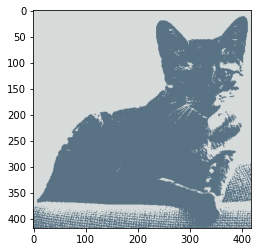

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('chat.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('chat.jpg', quant)
plt.imshow(image)

cv2.imread('chat.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()


# Ajout de bruit 

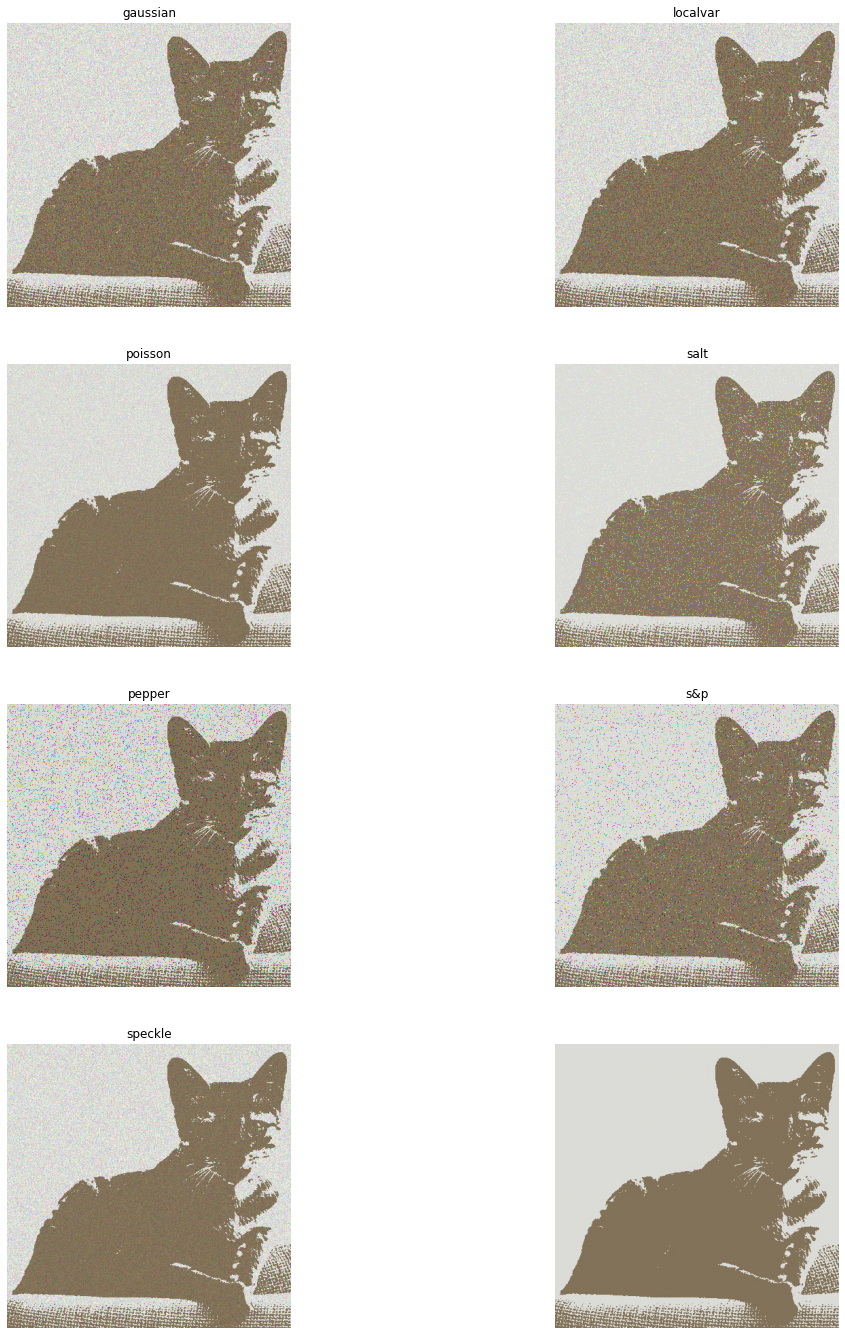

In [3]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interactive

img_path='chat.jpg'
img = skimage.io.imread(img_path)/255.0
def plotnoise(img, mode,r,c,i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")
plt.show()
plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)

# Affichage du résultat avec la méthode "interact"

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interactive

img_path='chat.jpg'
img = skimage.io.imread(img_path)/255.0
def f(mode):
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
interact(f,mode=['gaussian','localvar','poisson','salt','pepper','s&p','speckle',None]);

interactive(children=(Dropdown(description='mode', options=('gaussian', 'localvar', 'poisson', 'salt', 'pepper…

# Appliquer un filtre sur chaque résultat obtenue 

### Dans notre cas on va utiliser le filtre Gaussian


In [5]:
import cv2
import numpy
  
# image path 
img_path='chat.jpg'
img = skimage.io.imread(img_path)/255.0
def f(mode):
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        dst = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
        plt.imshow(gimg)
        
    else:
        plt.imshow(img)
    plt.title(mode)
interact(f,mode=['gaussian','localvar','poisson','salt','pepper','s&p','speckle',None]);

interactive(children=(Dropdown(description='mode', options=('gaussian', 'localvar', 'poisson', 'salt', 'pepper…

# Image Segmentation using Thresholding

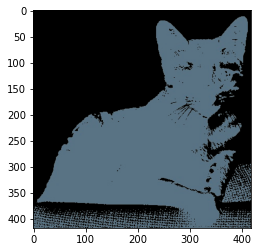

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='chat.jpg'
img = cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh
filtered = filter_image(img, img_otsu)
#cv2.imwrite('chat.jpg', quant)
plt.imshow(filtered)